# ROB317 - Vision 3D
# TP1 : Homographies

**Objectif:** Travailler sur l'estimation d'homographie entre deux images à l'aide de la bibliothèque OpenCV sous Python.

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("Version d'OpenCV:", cv2.__version__)

# Path to images
PATH_IMG = './Images_Homographie/'

Version d'OpenCV: 4.10.0


## Q1 : Cas où la transformation est une homographie

**Question:** Dans quels cas la transformation entre deux images est-elle une homographie ?

### Reponse:

A transformation between two images is a homography when the camera undergoes a pure rotation about its optical center (no translation), or when the observed scene is planar and viewed from different poses.

## Q2 : Estimation de l'homographie - Sélection de points

**Question:** À partir du code fourni, essayez d'estimer l'homographie permettant de transformer l'image de la mosaïque `Pompei.jpg` en vue verticale (en supposant le cadre carré). Combien de points au minimum devez-vous sélectionner ?

The minimum amount of points is 4, so that we can solve the Direct Linear Transformation (DLT) system. The four points will give us a exact solution, however if we get more points we'll get inconsistencies due to noise where the system would be re-written as:

$$
A.h = w
$$

where $w \neq 0$. Leading us to estimate the best possible value through: 

$$
\hat{h} = argmin_{h} \bold{w^{t}w}
$$

Using the Singular Value Decomposition method.

### Code pour la sélection de points

**Instructions:**
- Clic gauche : sélectionner un point
- Clic droit : remettre les points à zéro
- Touche 'q' : valider la sélection (minimum 4 points)

Dimension de l'image : 333 lignes x 500 colonnes x 3 couleurs


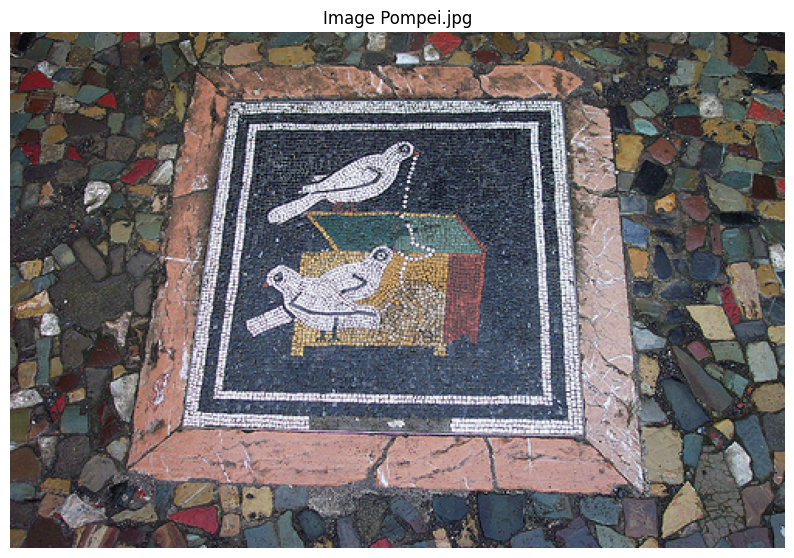

In [11]:
# Chargement de l'image Pompei
img = np.uint8(cv2.imread(PATH_IMG + "Pompei.jpg"))

(h, w, c) = img.shape
print("Dimension de l'image :", h, "lignes x", w, "colonnes x", c, "couleurs")

# Affichage de l'image pour référence
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image Pompei.jpg")
plt.axis('off')
plt.show()

In [12]:
# Fonction de sélection de points avec la souris
def select_points(event, x, y, flags, param):
    global points_selected, X_init
    global img, clone
    if (event == cv2.EVENT_FLAG_LBUTTON):
        x_select, y_select = x, y
        points_selected += 1
        cv2.circle(img, (x_select, y_select), 8, (0, 255, 255), 1)
        cv2.line(img, (x_select-8, y_select), (x_select+8, y_select), (0, 255, 0), 1)
        cv2.line(img, (x_select, y_select-8), (x_select, y_select+8), (0, 255, 0), 1)
        X_init.append([x_select, y_select])
    elif event == cv2.EVENT_FLAG_RBUTTON:
        points_selected = 0
        X_init = []
        img = clone.copy()

# Initialisation
img = np.uint8(cv2.imread(PATH_IMG + "Pompei.jpg"))
clone = img.copy()
points_selected = 0
X_init = []

cv2.namedWindow("Image initiale")
cv2.setMouseCallback("Image initiale", select_points)

while True:
    cv2.imshow("Image initiale", img)
    key = cv2.waitKey(1) & 0xFF
    if (key == ord("q")) & (points_selected >= 4):
        break

cv2.destroyAllWindows()

# Conversion en array numpy
X_init = np.asarray(X_init, dtype=np.float32)
print("Points sélectionnés (X_init) =", X_init)
print("Nombre de points:", len(X_init))

Points sélectionnés (X_init) = [[122. 232.]
 [150.  55.]
 [345.  55.]
 [361. 260.]]
Nombre de points: 4


In [13]:
# Saisie des coordonnées de destination
# Pour un cadre carré, définissez les coordonnées cibles

X_final = np.zeros((points_selected, 2), np.float32)
for i in range(points_selected):
    string_input = "Correspondant de {} ? ".format(X_init[i])
    X_final[i] = input(string_input).split(" ", 2)

print("Points de destination (X_final) =", X_final)

ValueError: could not convert string to float: ''

---
## Q3 : Estimation de l'homographie par SVD

**Question:** Pour estimer l'homographie, créez la matrice $2n \times 9$ $A$ comme indiqué en cours à partir de vos $n$ correspondances, puis résolvez le système $Ah = 0$ en utilisant la décomposition en valeurs singulières.

**Rappel de la méthode:**
1. Construire la matrice $A$ (dimension $2n \times 9$)
2. Résoudre $Ah = 0$ avec SVD
3. Normaliser les coordonnées avant, dé-normaliser après

### Questions à répondre:

**a) Quel est l'intérêt de normaliser les coordonnées ?**

*Réponse:*

The normalisation constrain is usefull because it help the numerical stability of the A martix before the SVD process.

**b) Quel indice de confiance pouvez-vous utiliser pour évaluer la fiabilité du résultat ?**

The best reliability it having the last 2 sigma ratio $\frac{\sigma_8}{\sigma_9}$ large.

### Implémentation de l'estimation d'homographie

In [ ]:
def normalize_points(points):
    """
    Normalise les points pour améliorer la stabilité numérique.
    Retourne les points normalisés et la matrice de normalisation T.
    
    TODO: Implémenter la normalisation
    - Centrer les points (soustraire la moyenne)
    - Mettre à l'échelle pour que la distance moyenne à l'origine soit sqrt(2)
    """
    # TODO: Votre code ici
    pass

In [ ]:
def build_matrix_A(X_src, X_dst):
    """
    Construit la matrice A (2n x 9) pour le système Ah = 0.
    
    Pour chaque correspondance (x, y) -> (x', y'), on a 2 équations:
    [-x, -y, -1, 0, 0, 0, x*x', y*x', x']
    [0, 0, 0, -x, -y, -1, x*y', y*y', y']
    
    TODO: Implémenter la construction de la matrice A
    """
    # TODO: Votre code ici
    pass

In [ ]:
def estimate_homography(X_src, X_dst):
    """
    Estime l'homographie H telle que X_dst = H @ X_src (en coordonnées homogènes).
    
    Étapes:
    1. Normaliser X_src et X_dst
    2. Construire la matrice A
    3. Résoudre Ah = 0 avec SVD: U, S, V = np.linalg.svd(A)
    4. h est la dernière ligne de V
    5. Reformater h en matrice 3x3
    6. Dé-normaliser H
    
    TODO: Implémenter l'estimation complète
    """
    # TODO: Votre code ici
    pass

In [ ]:
# Estimation de H avec vos points
# TODO: Appeler votre fonction estimate_homography

# H = estimate_homography(X_init, X_final)
# print("Matrice d'homographie H:")
# print(H)

In [ ]:
# Application de l'homographie et affichage du résultat

# TODO: Remplacer par votre H estimée
H = np.array([[1.1, 0.0, 10.0], [0.5, 0.9, -25.0], [0.0, 0.0, 1.0]])  # Exemple

img_original = cv2.imread(PATH_IMG + "Pompei.jpg")
img_warp = cv2.warpPerspective(img_original, H, (w, h))

# Affichage côte à côte
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_warp, cv2.COLOR_BGR2RGB))
axes[1].set_title("Image rectifiée")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# (Optionnel) Affichage avec OpenCV et sauvegarde
# cv2.imshow("Image rectifiée", img_warp)
# k = cv2.waitKey(0)
# if (k == ord("q")):
#     cv2.destroyAllWindows()
# elif (k == ord("s")):
#     cv2.imwrite("img_rectified.png", img_warp)
#     cv2.destroyAllWindows()

---
# Partie 3 : Création de panorama

## Q4 : Création de panorama par correspondances

**Question:** Modifier le script fourni afin de saisir les points par paires entre deux images, de façon à réaliser un panorama. Quelle condition doit respecter la prise de vue entre les deux images ?

### Votre réponse (condition de prise de vue):

*Écrivez votre réponse ici...*


In [ ]:
# Chargement des deux images pour le panorama
# TODO: Adapter les noms de fichiers selon les images disponibles

# img1 = cv2.imread(PATH_IMG + "panorama1.jpg")
# img2 = cv2.imread(PATH_IMG + "panorama2.jpg")

# print("Image 1:", img1.shape)
# print("Image 2:", img2.shape)

In [ ]:
def select_point_pairs(img1, img2):
    """
    Permet de sélectionner des paires de points correspondants entre deux images.
    
    TODO: Implémenter la sélection de points par paires
    - Afficher les deux images côte à côte ou alternativement
    - Permettre de cliquer sur un point dans img1 puis son correspondant dans img2
    - Retourner les deux listes de points
    """
    # TODO: Votre code ici
    pass

In [ ]:
def create_panorama(img1, img2, H):
    """
    Crée un panorama en combinant img1 et img2 avec l'homographie H.
    
    TODO: Implémenter la création du panorama
    - Calculer la taille du canvas de sortie
    - Warper img2 vers le repère de img1
    - Combiner les deux images
    """
    # TODO: Votre code ici
    pass

In [ ]:
# TODO: Code pour créer le panorama
# 1. Sélectionner les paires de points
# 2. Estimer l'homographie
# 3. Créer le panorama

---
## Q5 : Paramètres de la transformation

**Question:** Comment retrouver les paramètres de cette transformation à partir de ceux de l'homographie ?

### Votre réponse:

*Écrivez votre réponse ici...*

**Indice:** Pensez à la décomposition de l'homographie en rotation, translation, et paramètres intrinsèques.


In [ ]:
def decompose_homography(H, K=None):
    """
    Décompose l'homographie pour extraire les paramètres de transformation.
    
    TODO: Implémenter la décomposition de H
    """
    # TODO: Votre code ici
    pass

---
## Q6 : Uniformisation des couleurs

**Question:** Proposer une stratégie d'uniformisation des couleurs entre les deux images visant à éviter les défauts photométriques à la jonction entre les deux images.

### Votre réponse:

*Décrivez votre stratégie ici...*

**Pistes possibles:**
- 
- 
- 

In [ ]:
def blend_images(img1, img2_warped, overlap_region):
    """
    Fusionne deux images avec uniformisation des couleurs.
    
    TODO: Implémenter votre stratégie d'uniformisation
    - Égalisation d'histogramme?
    - Blending linéaire dans la zone de chevauchement?
    - Multi-band blending?
    - Correction de gain/offset?
    """
    # TODO: Votre code ici
    pass

In [ ]:
# TODO: Tester votre stratégie d'uniformisation sur le panorama

---
# Résumé et Conclusions

### Ce que j'ai appris:

1. 
2. 
3. 

### Difficultés rencontrées:

- 
- 

### Améliorations possibles:

- 
- 